# Data Collection from Yahoo Finance

In [20]:
pip install yfinance

yfinance library fetches data from Yahoo Finance, and the availability of certain currency exchange rates may vary. Additionally, it's always a good practice to check the terms of use for the data provider to ensure compliance with their policies

In [21]:
import yfinance as yfsource

This code uses the yf.download function to download historical data for the specified ticker symbol (USDIDR=X). Make sure to adjust the start and end parameters according to your desired time range.

In [22]:
# Specify the ticker symbol for the USD to IDR exchange rate
usd_to_idr_ticker = "USDIDR=X"

# Download historical data for the exchange rate
usd_idr_exchange_rate_data = yfsource.download(usd_to_idr_ticker, start="2013-1-1", end="2023-12-16")

# Print the last available exchange rate
usd_idr_last_exchange_rate = usd_idr_exchange_rate_data["Close"].iloc[-1]
print(f"Last USD to IDR exchange rate: {usd_idr_last_exchange_rate} IDR")

[*********************100%%**********************]  1 of 1 completed
Last USD to IDR exchange rate: 15468.0 IDR


Making sure the right rate quotation is downloaded

In [23]:
usd_idr_exchange_rate_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-01,9607.799805,9623.599609,9599.000000,9609.000000,9609.000000,0
2013-01-02,9609.799805,9658.400391,9608.900391,9609.000000,9609.000000,0
2013-01-03,9620.900391,9646.599609,9620.900391,9622.500000,9622.500000,0
2013-01-04,9627.200195,9650.000000,9627.200195,9626.299805,9626.299805,0
2013-01-07,9610.000000,9687.000000,9610.000000,9770.000000,9770.000000,0
...,...,...,...,...,...,...
2023-12-11,15560.200195,15672.099609,15435.900391,15560.200195,15560.200195,0
2023-12-12,15647.000000,15650.299805,15448.500000,15647.000000,15647.000000,0
2023-12-13,15569.000000,15679.000000,15566.599609,15569.000000,15569.000000,0


In [24]:
# Specify the ticker symbol for BTC to USD
btc_to_usd_ticker = "BTC-USD"

# Download historical data for BTC to USD
btc_to_usd_data = yfsource.download(btc_to_usd_ticker, start="2019-11-1", end="2023-12-16")

# Print the last available BTC to USD closing price
last_btc_price = btc_to_usd_data["Close"].iloc[-1]
print(f"Last BTC to USD closing price: ${last_btc_price:.2f}")


[*********************100%%**********************]  1 of 1 completed
Last BTC to USD closing price: $41929.76


In this code, BTC-USD is the ticker symbol for Bitcoin to USD on Yahoo Finance. Adjust the start and end parameters according to desired time range.

In [25]:
btc_to_usd_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-01,9193.992188,9275.657227,9132.047852,9261.104492,9261.104492,24324691031
2019-11-02,9259.783203,9377.486328,9249.587891,9324.717773,9324.717773,21242676385
2019-11-03,9324.787109,9379.806641,9141.251953,9235.354492,9235.354492,21132220847
2019-11-04,9235.607422,9505.051758,9191.485352,9412.612305,9412.612305,26170255634
2019-11-05,9413.004883,9457.417969,9256.931641,9342.527344,9342.527344,26198609048
...,...,...,...,...,...,...
2023-12-11,43792.019531,43808.375000,40234.578125,41243.832031,41243.832031,40632672038
2023-12-12,41238.734375,42048.304688,40667.562500,41450.222656,41450.222656,24779520132
2023-12-13,41468.464844,43429.781250,40676.867188,42890.742188,42890.742188,26797884674


# Data cleaning and differencing for time series analysis

**Remove rows containing null values**

In [26]:
# Original lengths before cleaning N/A values
original_length_usd_idr = len(usd_idr_exchange_rate_data)
original_length_btc_usd = len(btc_to_usd_data)

# Drop N/A values
usd_idr_exchange_rate_data = usd_idr_exchange_rate_data.dropna()
btc_to_usd_data = btc_to_usd_data.dropna()

# Lengths after cleaning N/A values
cleaned_length_usd_idr = len(usd_idr_exchange_rate_data)
cleaned_length_btc_usd = len(btc_to_usd_data)

# Print the results
print("Original Length (USD to IDR):", original_length_usd_idr)
print("Cleaned Length (USD to IDR):", cleaned_length_usd_idr)
print("Rows Removed (USD to IDR):", original_length_usd_idr - cleaned_length_usd_idr)

print("\nOriginal Length (BTC to USD):", original_length_btc_usd)
print("Cleaned Length (BTC to USD):", cleaned_length_btc_usd)
print("Rows Removed (BTC to USD):", original_length_btc_usd - cleaned_length_btc_usd)


Original Length (USD to IDR): 2855
Cleaned Length (USD to IDR): 2855
Rows Removed (USD to IDR): 0

Original Length (BTC to USD): 1506
Cleaned Length (BTC to USD): 1506
Rows Removed (BTC to USD): 0


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import plotly.express as px

**Here's a brief description of the libraries and modules being imported:**



*   numpy (np): A library for numerical operations in Python.
*   pandas (pd): A data manipulation and analysis library.
*   matplotlib.pyplot (plt): A plotting library for creating visualizations.
*   math: The Python math module for mathematical operations.
*   statsmodels.tsa.arima.model.ARIMA: The ARIMA (AutoRegressive Integrated Moving Average) model from the statsmodels library for time series analysis.
*   sklearn.metrics.mean_squared_error: A function for calculating the mean squared error.
*   sklearn.metrics.mean_absolute_error: A function for calculating the mean absolute error.
*   plotly.express: A plotting library that generated avdanced and more interactive visualisation

**Making sure the data stationary for time series analysis**

In [28]:
from statsmodels.tsa.stattools import adfuller

def difference_and_adf_test(series, title):
    # Perform differencing
    diff_series = series.diff().dropna()

    # Perform ADF test
    result = adfuller(diff_series)
    print(f'ADF Statistic for {title}: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values: {result[4]}')

# Perform differencing and ADF test for USD to IDR data
difference_and_adf_test(usd_idr_exchange_rate_data['Adj Close'], 'USD to IDR Exchange Rate')

print("")

# Perform differencing and ADF test for BTC to USD data
difference_and_adf_test(btc_to_usd_data['Close'], 'BTC to USD Rate')

ADF Statistic for USD to IDR Exchange Rate: -10.66980666660537
p-value: 4.195470499141706e-19
Critical Values: {'1%': -3.4326644432728743, '5%': -2.862562560883189, '10%': -2.5673143399156544}

ADF Statistic for BTC to USD Rate: -12.166153705962431
p-value: 1.4557443084669624e-22
Critical Values: {'1%': -3.4347287139577753, '5%': -2.8634739225299133, '10%': -2.5677995973755325}


This code defines a function (difference_and_adf_test) that performs differencing, plots the differenced series, and conducts the ADF test. The ADF test is used to check for stationarity.

# Plot for quotation of USD-IDR and BTC-USD pair

In [29]:
import plotly.express as px

# Plot USD to IDR exchange rate with dark background
fig_usd_to_idr = px.line(usd_idr_exchange_rate_data, x=usd_idr_exchange_rate_data.index, y="Adj Close", title="USD to IDR Exchange Rate")
fig_usd_to_idr.update_layout(template="plotly_dark")

# Plot BTC to USD rate with dark background and golden line color
fig_btc_to_usd = px.line(btc_to_usd_data, x=btc_to_usd_data.index, y="Adj Close", title="BTC to USD Rate", line_shape="linear")
fig_btc_to_usd.update_traces(line=dict(color='gold'))

fig_btc_to_usd.update_layout(template="plotly_dark")

# Show the plots
fig_usd_to_idr.show()
fig_btc_to_usd.show()


# Split Data into Training and Testing for ARIMA model prediction

Determine Training and Testing Data Splits:

* to_row_usd_idr: Calculates the index that corresponds to 90% of the length of the USD to IDR exchange rate data.

* to_row_btc_usd: Calculates the index that corresponds to 90% of the length of the BTC to USD rate data.

In [30]:
to_row_usd_idr = int(len(usd_idr_exchange_rate_data)*0.9)

training_data_usd_idr = list(usd_idr_exchange_rate_data[0:to_row_usd_idr]['Adj Close'])

testing_data_usd_idr = list(usd_idr_exchange_rate_data[to_row_usd_idr:]['Adj Close'])

to_row_btc_usd = int(len(btc_to_usd_data)*0.9)

training_data_btc_usd = list(btc_to_usd_data[0:to_row_btc_usd]['Adj Close'])

testing_data_btc_usd = list(btc_to_usd_data[to_row_btc_usd:]['Adj Close'])


Create Training and Testing Datasets:

* training_data_usd_idr: Extracts the adjusted closing prices (Adj Close) of the USD to IDR exchange rate from the beginning of the dataset up to the 90% split index.

* testing_data_usd_idr: Extracts the adjusted closing prices (Adj Close) of the USD to IDR exchange rate from the 90% split index to the end of the dataset.

* training_data_btc_usd: Extracts the adjusted closing prices (Adj Close) of the BTC to USD rate from the beginning of the dataset up to the 90% split index.

* testing_data_btc_usd: Extracts the adjusted closing prices (Adj Close) of the BTC to USD rate from the 90% split index to the end of the dataset.

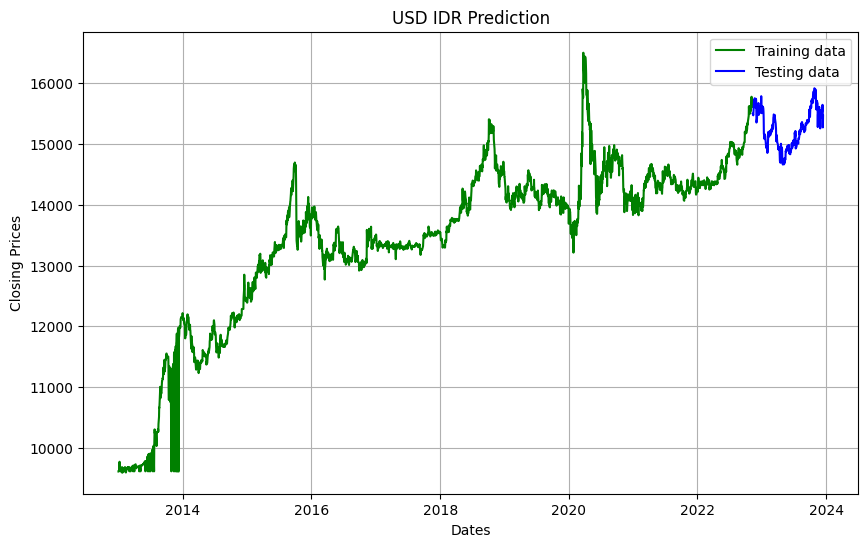

In [31]:
plt.figure(figsize=(10,6))
plt.title('USD IDR Prediction')
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(usd_idr_exchange_rate_data[0:to_row_usd_idr]['Adj Close'], 'green', label='Training data')
plt.plot(usd_idr_exchange_rate_data[to_row_usd_idr:]['Adj Close'], 'blue', label='Testing data')
plt.legend()

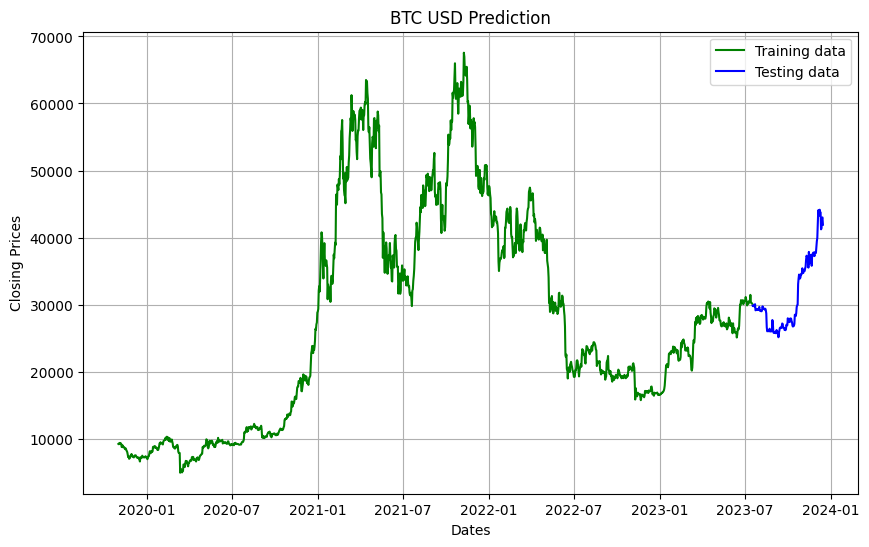

In [32]:
plt.figure(figsize=(10,6))
plt.title('BTC USD Prediction')
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(btc_to_usd_data[0:to_row_btc_usd]['Adj Close'], 'green', label='Training data')
plt.plot(btc_to_usd_data[to_row_btc_usd:]['Adj Close'], 'blue', label='Testing data')
plt.legend()


# Figuring out the best ARIMA model order

In [33]:
pip install pmdarima

This code below automates the process of selecting the best ARIMA model for the given USD to IDR exchange rate data by using the auto_arima function from the pmdarima library. The selected model's summary provides insights into the chosen hyperparameters and the overall fit of the model to the data.

In [34]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

stepwise_fit = auto_arima(usd_idr_exchange_rate_data['Adj Close'],
                          suppress_warnings=True)

stepwise_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2855
Model:               SARIMAX(4, 1, 5)   Log Likelihood              -17966.751
Date:                Mon, 18 Dec 2023   AIC                          35955.502
Time:                        23:29:10   BIC                          36021.024
Sample:                             0   HQIC                         35979.130
                               - 2855                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.7010      6.989      0.673      0.501      -8.997      18.399
ar.L1         -0.9765      0.008   -122.836      0.000      -0.992      -0.961
ar.L2         -0.8949      0.009    -94.626      0.000      -0.913      -0.876
ar.L3         -0.8801      0.008   -104.203      0.000      -0.897      -0.864
ar.L4         -0.8401      0.007   -123.703      0.000      -0.853      -0.827
ma.L1          0.5443      0.010     56.069      0.000       0.525       0.563
ma.L2          0.3645      0.011     32.000      0.000       0.342       0.387
ma.L3          0.3431      0.011     31.337      0.000       0.322       0.365
ma.L4          0.4248      0.010     43.886      0.000       0.406       0.444
ma.L5         -0.1823      0.010    -17.886      0.000      -0.202      -0.162
sigma2      1.714e+04    107.438    159.521      0.000    1.69e+04    1.73e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):            324362.41
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               0.24   Skew:                            -1.10
Prob(H) (two-sided):                  0.00   Kurtosis:                        55.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

stepwise_fit = auto_arima(btc_to_usd_data['Adj Close'],
                          suppress_warnings=True)

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1506
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -12706.314
Date:                Mon, 18 Dec 2023   AIC                          25424.628
Time:                        23:30:00   BIC                          25456.527
Sample:                    11-01-2019   HQIC                         25436.509
                         - 12-15-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     20.9654     32.166      0.652      0.515     -42.079      84.009
ar.L1          0.8154      0.036     22.447      0.000       0.744       0.887
ar.L2         -0.9098      0.031    -29.243      0.000      -0.971      -0.849
ma.L1         -0.8523      0.034    -24.707      0.000      -0.920      -0.785
ma.L2          0.9271      0.029     32.122      0.000       0.871       0.984
sigma2      1.275e+06   2.31e+04     55.141      0.000    1.23e+06    1.32e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              2918.31
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.48   Skew:                            -0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Training and Testing Data using ARIMA

In [36]:
model_predictions_usd_idr = []
n_test_observer_usd_idr = len(testing_data_usd_idr)

model_predictions_btc_usd = []
n_test_observer_btc_usd = len(testing_data_btc_usd)

This code is initializing empty lists model_predictions_usd_idr and model_predictions_btc_usd to store the predicted values of two financial time series: USD to IDR exchange rate (usd_idr_exchange_rate_data) and BTC to USD rate (btc_to_usd_data).

Additionally, it defines variables n_test_observer_usd_idr and n_test_observer_btc_usd to represent the number of observations in the testing datasets for the respective financial time series.

**ARIMA Model Fitting:**

* model = ARIMA(training_data_usd_idr, order=(2, 1, 3)): Initializes an ARIMA model with a specific set of hyperparameters (order = (2, 1, 3)).

* model_fit = model.fit(): Fits the ARIMA model to the training data (training_data_usd_idr). This involves estimating the model parameters based on historical data.

In [37]:
for i in range(n_test_observer_usd_idr):
    model = ARIMA(training_data_usd_idr, order=(4, 1, 5))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions_usd_idr.append(yhat)
    actual_test_value = testing_data_usd_idr[i]
    training_data_usd_idr.append(actual_test_value)



**Model Prediction:**

* output = model_fit.forecast(): Makes a one-step forecast using the fitted ARIMA model. The forecast() method is used to predict the next value in the time series.

* yhat = output[0]: Extracts the predicted value from the forecast output.

**Updating Predictions and Training Data:**

* model_predictions_usd_idr.append(yhat): Appends the predicted value (yhat) to the list model_predictions_usd_idr. This list is being used to store the model predictions.

* actual_test_value = testing_data_usd_idr[i]: Retrieves the actual value from the testing dataset corresponding to the current iteration.

* training_data_usd_idr.append(actual_test_value): Updates the training dataset by appending the actual test value. This simulates a scenario where the model is retrained with the actual observation from the testing set, and the process repeats.

In [38]:
for i in range(n_test_observer_btc_usd):
    model = ARIMA(training_data_btc_usd, order=(2, 1, 2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions_btc_usd.append(yhat)
    actual_test_value = testing_data_btc_usd[i]
    training_data_btc_usd.append(actual_test_value)

The code above also have the same functions like in the usd idr iteration

In [39]:
print(len(model_predictions_usd_idr))
print(len(testing_data_usd_idr))

286
286


In [40]:
print(len(model_predictions_btc_usd))
print(len(testing_data_btc_usd))

151
151


The code above ensures that model predictions and testing data have the same length of array, this is important to make sure it can be plotted accurately

# Plot for comparison between ARIMA Prediction and actual Adjusted Close Price for USD-IDR and BTC-USD

In [41]:
import plotly.express as px

# Assuming you have 'date_range', 'model_predictions_usd_idr', and 'testing_data_usd_idr' available
date_range = usd_idr_exchange_rate_data[to_row_usd_idr:-1].index  # Ensure the same length for date_range

# Create a DataFrame for plotting
plot_data_usd_idr = pd.DataFrame({
    'Date': date_range,
    'USD IDR Predicted Rate': model_predictions_usd_idr[:-1],
    'USD IDR Actual Price': testing_data_usd_idr[:-1]
})

# Plot using Plotly Express
fig = px.line(plot_data_usd_idr, x='Date', y=['USD IDR Predicted Rate', 'USD IDR Actual Price'], title='USD IDR Prediction')
fig.update_layout(template="plotly_dark")
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Price')
fig.show()


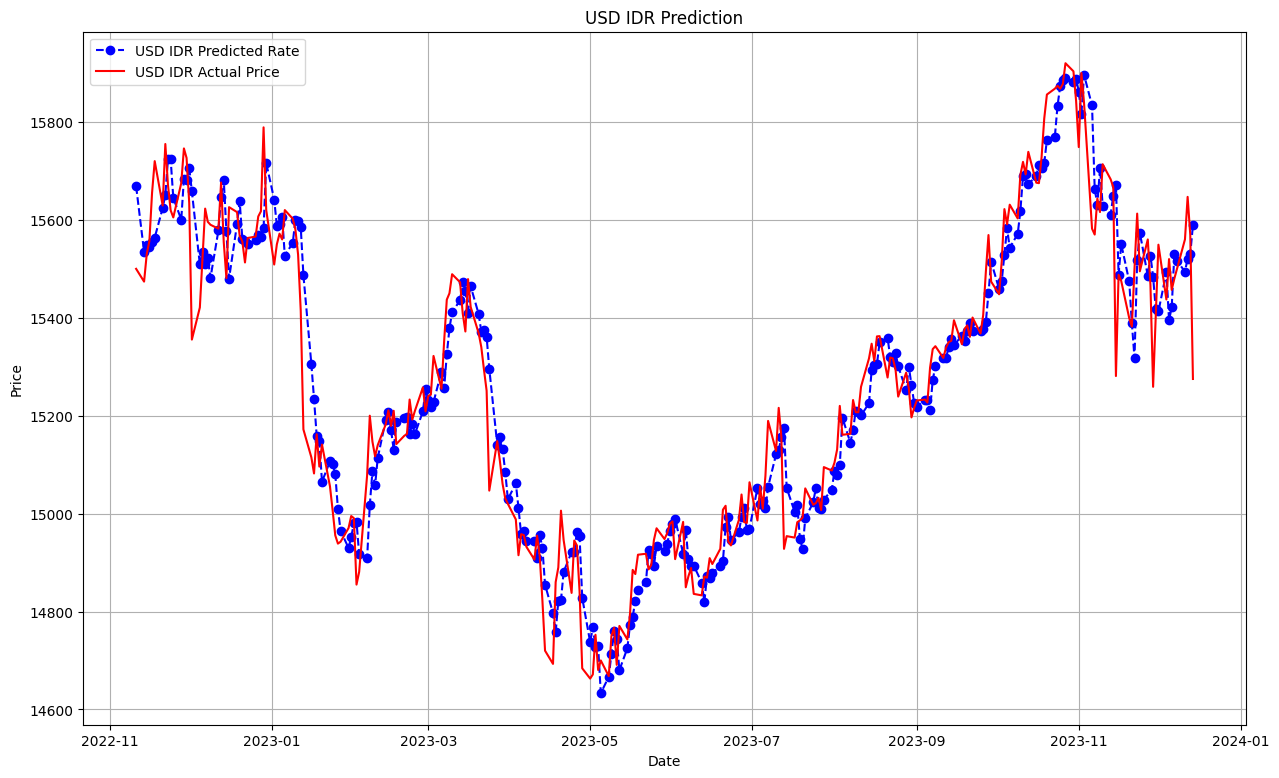

In [42]:
plt.figure(figsize=(15,9))
plt.grid(True)

date_range = usd_idr_exchange_rate_data[to_row_usd_idr:-1].index  # Ensure the same length for date_range

plt.plot(date_range, model_predictions_usd_idr[:-1], color='blue', marker='o', linestyle='dashed', label='USD IDR Predicted Rate')
plt.plot(date_range, testing_data_usd_idr[:-1], color='red', label='USD IDR Actual Price')

plt.title('USD IDR Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()



In [43]:
import plotly.express as px

# Assuming you have 'date_range', 'model_predictions_btc_usd', and 'testing_data_btc_usd' available
date_range = btc_to_usd_data[to_row_btc_usd:].index

# Create a DataFrame for plotting
plot_data_btc_usd = pd.DataFrame({
    'Date': date_range,
    'BTC USD Predicted Rate': model_predictions_btc_usd,
    'BTC USD Actual Price': testing_data_btc_usd
})

# Plot using Plotly Express
fig = px.line(plot_data_btc_usd, x='Date', y=['BTC USD Predicted Rate', 'BTC USD Actual Price'], title='BTC USD Prediction')
fig.update_layout(template="plotly_dark")
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Price')
fig.show()


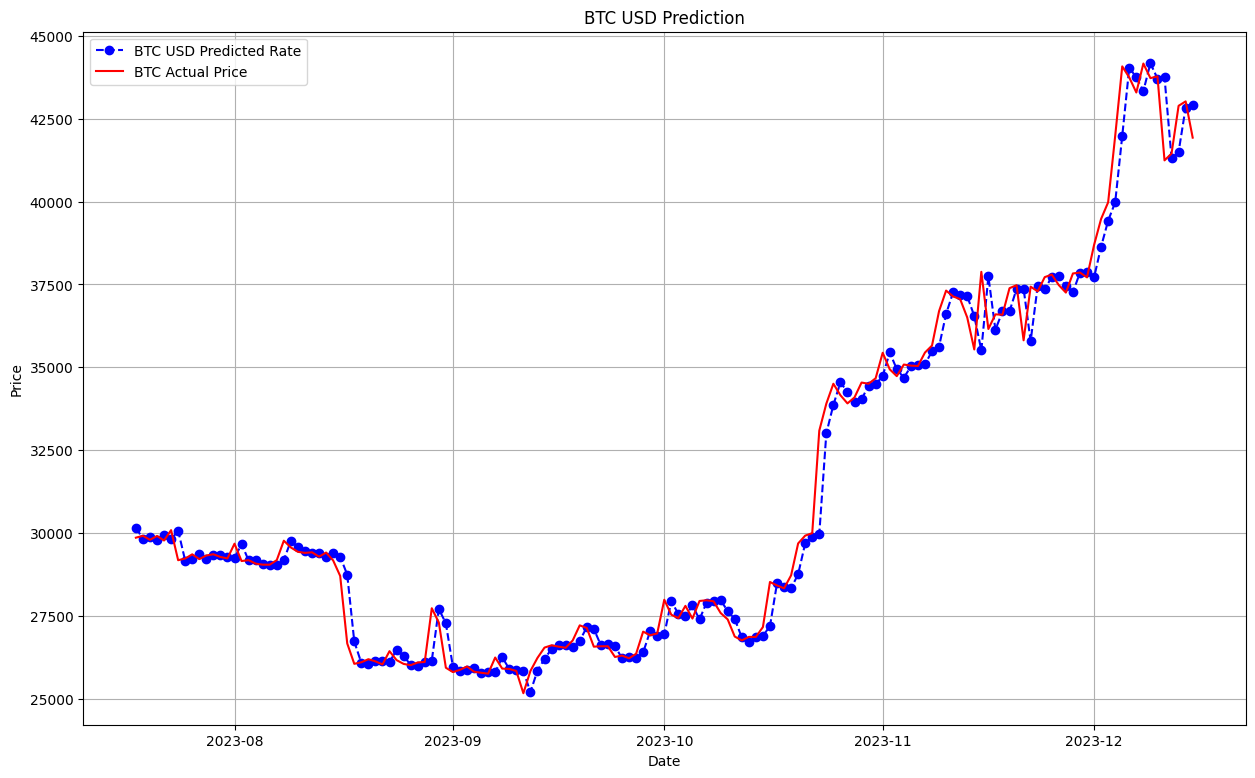

In [44]:
plt.figure(figsize=(15,9))
plt.grid(True)

date_range = btc_to_usd_data[to_row_btc_usd:].index

plt.plot(date_range, model_predictions_btc_usd, color = 'blue', marker = 'o', linestyle = 'dashed', label = 'BTC USD Predicted Rate')
plt.plot(date_range, testing_data_btc_usd, color = 'red', label = 'BTC Actual Price')

plt.title('BTC USD Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Price Prediction

**ARIMA Model Fitting:**

* model = ARIMA(usd_idr_exchange_rate_data['Adj Close'], order=(2, 1, 3)): Initializes an ARIMA model with the specified order (p=2, d=1, q=3) and fits it to the historical adjusted closing prices of the USD to IDR exchange rate (usd_idr_exchange_rate_data['Adj Close']).

* model_fit = model.fit(): Fits the ARIMA model to the historical data, estimating the model parameters.

**Forecasting Future Values:**

* future_steps = 20: Specifies the number of future steps to forecast. In this case, it's set to 20, meaning the code will forecast the next 20 values.

* future_dates = pd.date_range(start="2023-12-17", periods=future_steps, freq='D'): Generates a sequence of future dates starting from the given date ("2023-12-17") with a daily frequency.

* future_predictions = model_fit.get_forecast(steps=future_steps).predicted_mean: Uses the get_forecast method to generate future forecasts. The predicted_mean attribute contains the predicted values for the specified number of future steps.

**Printing the Future Predictions:**

* future_predictions_df: Creates a DataFrame (future_predictions_df) containing the forecasted dates and corresponding ARIMA predictions.

* print(future_predictions_df): Prints the DataFrame, displaying the future dates and the corresponding ARIMA predictions.

In [45]:
model = ARIMA(usd_idr_exchange_rate_data['Adj Close'], order=(4, 1, 5))
model_fit = model.fit()

# Forecast future values
future_steps = 20  # Adjust the number of future steps as needed
future_dates = pd.date_range(start="2023-12-17", periods=future_steps, freq='D')  # Daily frequency
future_predictions = model_fit.get_forecast(steps=future_steps).predicted_mean

# Print the date and ARIMA predictions
future_predictions_df = pd.DataFrame({
    'Date': future_dates,
    'ARIMA Predictions': future_predictions
})

print(future_predictions_df)


           Date  ARIMA Predictions
2855 2023-12-17       15503.536500
2856 2023-12-18       15522.686477
2857 2023-12-19       15424.605296
2858 2023-12-20       15386.409472
2859 2023-12-21       15456.372817
2860 2023-12-22       15492.469746
2861 2023-12-23       15510.654559
2862 2023-12-24       15431.119471
2863 2023-12-25       15401.957065
2864 2023-12-26       15455.252311
2865 2023-12-27       15484.029727
2866 2023-12-28       15500.740770
2867 2023-12-29       15436.273583
2868 2023-12-30       15414.163559
2869 2023-12-31       15454.539611
2870 2024-01-01       15477.598066
2871 2024-01-02       15492.584512
2872 2024-01-03       15440.363056
2873 2024-01-04       15423.726972
2874 2024-01-05       15454.125803


the codes below have the same function like code above, but for predicting the price of BTC USD in the next 20 days

In [46]:
model2 = ARIMA(btc_to_usd_data['Adj Close'], order=(2, 1, 2))
model2_fit = model2.fit()

# Forecast future values
future_steps = 20  # Adjust the number of future steps as needed
future_dates = pd.date_range(start="2023-12-17", periods=future_steps, freq='D')  # Daily frequency
future_predictions2 = model2_fit.get_forecast(steps=future_steps).predicted_mean

# Print the date and ARIMA predictions
future_predictions_df2 = pd.DataFrame({
    'Date': future_dates,
    'ARIMA Predictions': future_predictions2
})

print(future_predictions_df2)


                 Date  ARIMA Predictions
2023-12-16 2023-12-17       41951.563631
2023-12-17 2023-12-18       42012.239427
2023-12-18 2023-12-19       42047.752933
2023-12-19 2023-12-20       42021.859601
2023-12-20 2023-12-21       41963.038984
2023-12-21 2023-12-22       41933.243150
2023-12-22 2023-12-23       41962.677544
2023-12-23 2023-12-24       42019.240103
2023-12-24 2023-12-25       42043.473784
2023-12-25 2023-12-26       42011.036312
2023-12-26 2023-12-27       41957.083542
2023-12-27 2023-12-28       41938.216900
2023-12-28 2023-12-29       41973.132259
2023-12-29 2023-12-30       42024.174051
2023-12-30 2023-12-31       42037.903583
2023-12-31 2024-01-01       42001.018854
2024-01-01 2024-01-02       41953.139713
2024-01-02 2024-01-03       41944.287287
2024-01-03 2024-01-04       41982.652976
2024-01-04 2024-01-05       42027.165906


the code below provides a qualitative analysis of the trend in the USD to IDR exchange rate and BTC to USD based on the ARIMA model's predictions for the next 20 days.

**Extracting First and Last Predicted Exchange Rates:**

* first_prediction: Extracts the first predicted exchange rate from the DataFrame.

* last_prediction: Extracts the last predicted exchange rate from the DataFrame.

# Trend conclusion based on ARIMA predictions

In [47]:
# Extract the first and last predicted exchange rates
first_prediction = future_predictions_df['ARIMA Predictions'].iloc[0]
last_prediction = future_predictions_df['ARIMA Predictions'].iloc[-1]

# Formulate the trend conclusion for USD to IDR exchange rate
if last_prediction > first_prediction:
    trend_conclusion = "Based on ARIMA prediction model by looking next 20 days of price prediction, the market for USD IDR is uptrending. Consider buying or holding USD"
elif last_prediction < first_prediction:
    trend_conclusion = "Based on ARIMA prediction model by looking next 20 days of price prediction, the market for USD IDR is downtrending. Consider selling USD"
else:
    trend_conclusion = "Based on ARIMA prediction model by looking next 20 days of price prediction, the market for USD IDR is sideways. Consider holding either USD or IDR."

# Print the trend conclusion
print(trend_conclusion)


Based on ARIMA prediction model by looking next 20 days of price prediction, the market for USD IDR is downtrending. Consider selling USD


**Formulating the Trend Conclusion:**

* Checks whether the last predicted exchange rate is higher (>) or lower (<) than
the first predicted exchange rate.

* Formulates a trend conclusion message based on the direction of the trend (uptrend, downtrend, or sideways).

In [48]:


# Extract the first and last predicted prices
first_prediction = future_predictions_df2['ARIMA Predictions'].iloc[0]
last_prediction = future_predictions_df2['ARIMA Predictions'].iloc[-1]

# Formulate the trend conclusion
if last_prediction > first_prediction:
    trend_conclusion = "Based on ARIMA prediction model by looking next 20 days of price prediction, the market for BTC USD is uptrending. Consider buying or holding BTC USD asset."
elif last_prediction < first_prediction:
    trend_conclusion = "Based on ARIMA prediction model by looking next 20 days of price prediction, the market for BTC USD is downtrending. Consider selling or converting to USD asset."
else:
    trend_conclusion = "Based on ARIMA prediction model by looking next 20 days of price prediction, the market for BTC USD is sideways. Consider keeping or holding BTC USD asset."

# Print the trend conclusion
print(trend_conclusion)


Based on ARIMA prediction model by looking next 20 days of price prediction, the market for BTC USD is uptrending. Consider buying or holding BTC USD asset.


# Model Performance Analysis

In [49]:
mape = np.mean(np.abs(np.array(model_predictions_usd_idr) - np.array(testing_data_usd_idr))/np.abs(testing_data_usd_idr))
print('Mean Absolute Percentage Error for usd-idr predictions:  ' + str(mape))

Mean Absolute Percentage Error for usd-idr predictions:  0.004030056475883926


In [50]:
mape2 = np.mean(np.abs(np.array(model_predictions_btc_usd) - np.array(testing_data_btc_usd))/np.abs(model_predictions_btc_usd))
print('Mean Absolute Percentage Error for btc-usd predictions:  ' + str(mape2))

Mean Absolute Percentage Error for btc-usd predictions:  0.013002891853874975
